In [ ]:
#`sns.set(style="whitegrid")` is a function in the Seaborn library for Python that sets 
#the default style for all plots to a white background with grid lines
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
sns.set_style("whitegrid")

In [23]:
df = pd.read_csv("innings_deliveries.csv")
df.head(10)

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]
5,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,6,0,6,NaN,NaN,[]
6,Royal Challengers Bengaluru,1,F du Plessis,KK Ahmed,V Kohli,0,0,0,NaN,NaN,[]
7,Royal Challengers Bengaluru,1,F du Plessis,KK Ahmed,V Kohli,4,0,4,NaN,NaN,[]
8,Royal Challengers Bengaluru,1,F du Plessis,KK Ahmed,V Kohli,0,1,1,NaN,NaN,[]
9,Royal Challengers Bengaluru,1,V Kohli,KK Ahmed,F du Plessis,1,0,1,NaN,NaN,[]


In [24]:
runs_distribution = df.groupby(['team',"over"]).agg({"runs_total": "sum"}).reset_index()

C:\Users\amitj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amitj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amitj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\amitj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

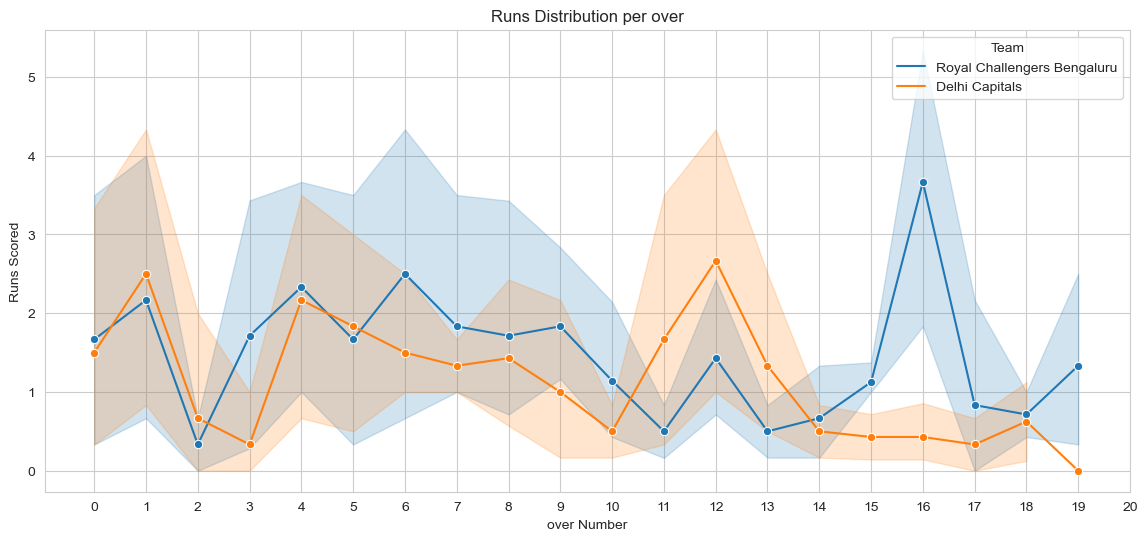

In [27]:
#A legend is an area describing the elements of the graph. In the Matplotlib library, there’s a function called legend
plt.figure(figsize=(14,6))
sns.lineplot(df,x="over",y="runs_total",hue="team", marker='o')
plt.title('Runs Distribution per over')
plt.xlabel('over Number')
plt.ylabel('Runs Scored')
plt.xticks(range(0,21))
plt.legend(title='Team')
plt.show()

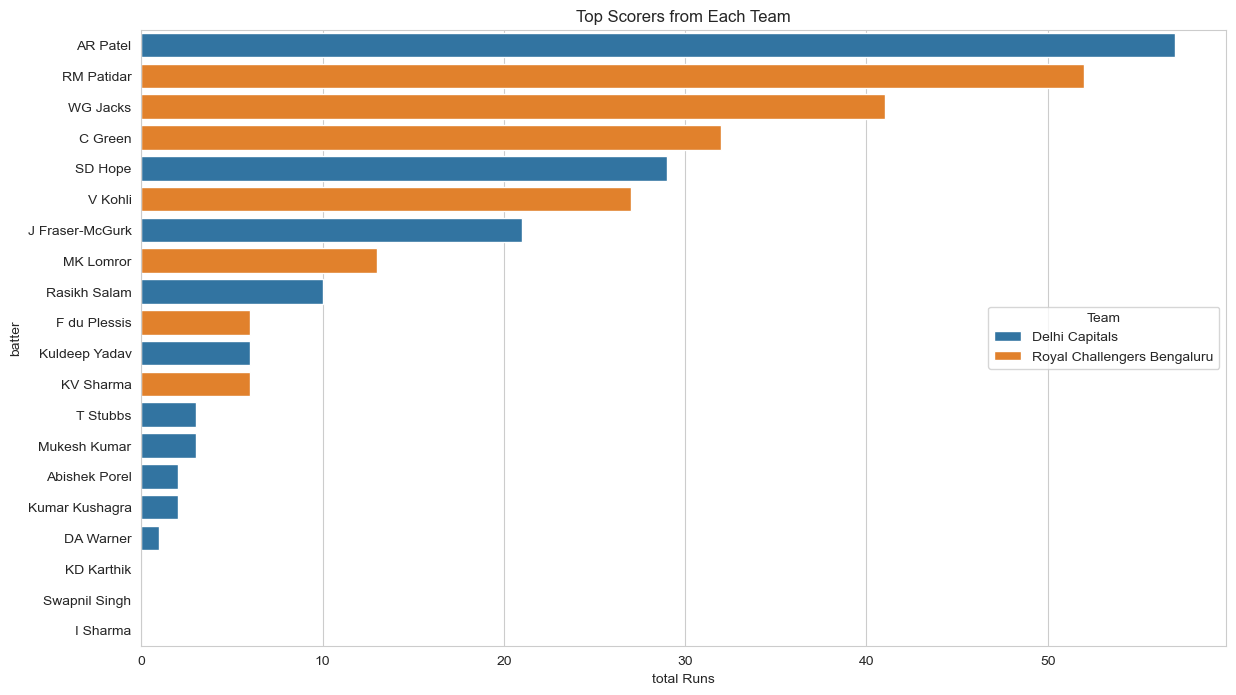

In [30]:
#Next, I’ll analyze the top scorers from each team to highlight individual performances. Let’s create a bar chart to visualize the top contributors in terms of runs
# calculating top scorers for each team
top_scorers = df.groupby(['team','batter']).agg({'runs_batter': 'sum'}).reset_index().sort_values(by='runs_batter', ascending=False)
plt.figure(figsize=(14,8))
sns.barplot(data=top_scorers, x='runs_batter', y='batter', hue= 'team', dodge=False)
plt.title('Top Scorers from Each Team')
plt.xlabel('total Runs')
plt.ylabel('batter')
plt.legend(title='Team')
plt.show()

C:\Users\amitj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amitj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


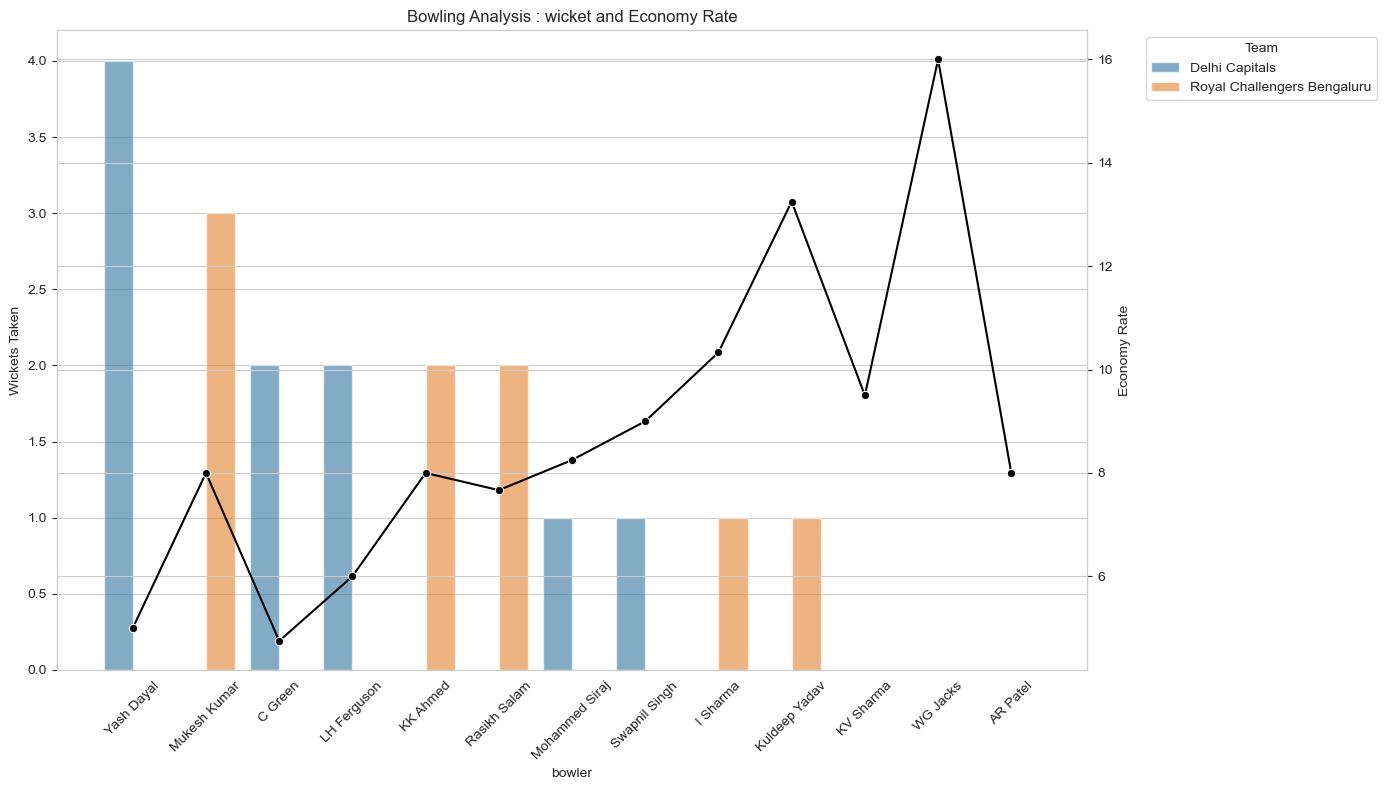

In [50]:
# let’s move on to a bowling analysis. We’ll look at which bowlers took the most wickets and their economy rates.
# It will involve calculating the number of wickets each bowler took and the number of runs they conceded per over bowled. 
# We’ll present this data in a combined bar and line plot for a comprehensive view of bowling performance:
#Not natural refers to something that is not related to or caused by things that occur in nature
#preparing data for bowling analysis
df['wickets_taken'] = df['wicket_kind'].notna().astype(int)
bowling_stats = df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum','over': 'nunique'}).reset_index()
# calculating economy rate (total runs conceded / number of overs bowled)
bowling_stats['economy_rate']= bowling_stats['runs_total'] / bowling_stats['over']
# sorting the data for batter visualizations' 
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)
#prepare the DataFrame For plotting
bowling_stats_sorted['wickets_taken'] = df['wicket_kind'].notna().astype(int)
bowling_stats = df.groupby(['team','bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)
#create the plot
fig, ax1 = plt.subplots(figsize=(14,8))
#Bar plot For wickets
sns.barplot(data=bowling_stats_sorted, x='bowler', y='wickets_taken', hue='team', ax=ax1, alpha=0.6)
ax1.set_ylabel('Wickets Taken')
ax1.set_xlabel('bowler')
ax1.set_title('Bowling Analysis : wicket and Economy Rate')
ax1.legend(title='Team', bbox_to_anchor=(1.05,1), loc='upper left')

for item in ax1.get_xticklabels():
    item.set_rotation(45)

ax2 = ax1.twinx()
sns.lineplot(data=bowling_stats_sorted,x='bowler', y='economy_rate',marker='o', sort = False, ax=ax2, color = 'black')
ax2.set_ylabel('Economy Rate')

plt.tight_layout()
plt.show()

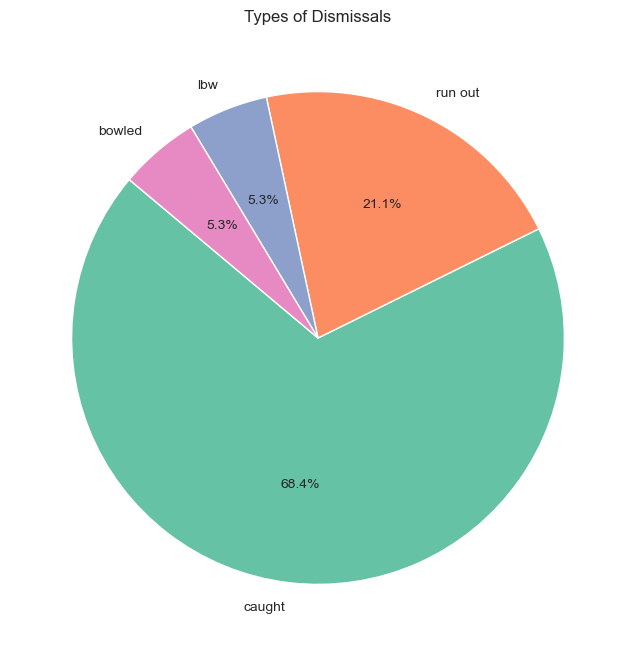

In [55]:
#let’s analyze the types of dismissals that occurred during the match to understand how most wickets were taken (e.g., caught, bowled, run out).
#This can provide insights into the nature of the pitch and the playing conditions. We’ll visualize this using a pie chart:
#autopct enables you to display the percent value using Python string formatting. For example, if autopct='%.2f', then for each pie wedge, the format string is '%.2f' and the numerical percent value for that wedge is pct,
dismissal_types = df['wicket_kind'].dropna().value_counts()
plt.figure(figsize=(8,8))
plt.pie(dismissal_types, labels=dismissal_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Types of Dismissals')
plt.show()

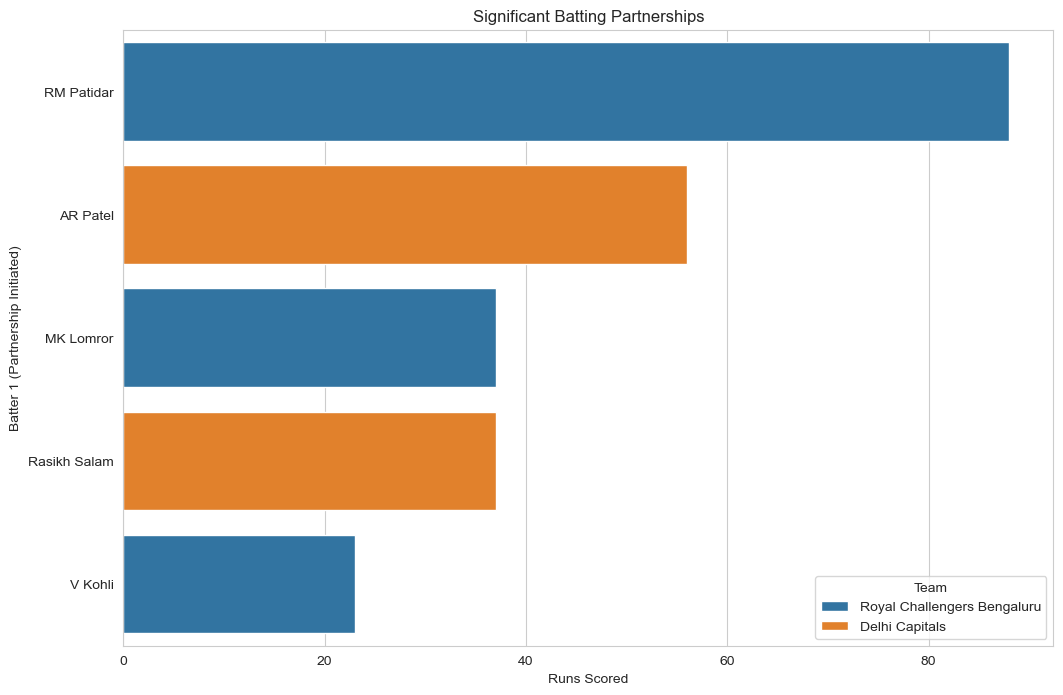

In [71]:
#let’s perform Partnerships Analysis by calculating and visualizing the most productive batting partnerships in the match. 
#We’ll look at runs scored per partnership and how long each partnership lasted in terms of balls faced:
# function to calculate partnerships
def calculate_partnerships(df):
    partnerships = []
    current_partnership = {}
    for i, row in df.iterrows():
        if i == 0 or (row['batter'] not in current_partnership.values()):
            if current_partnership:
                partnerships.append(current_partnership)
            current_partnership = {
                'team': row['team'],
                'batter1': row['batter'],
                'batter2': row['non_striker'],
                'runs': 0,
                'balls': 0
            }
        current_partnership['runs'] += row['runs_total']
        current_partnership['balls'] += 1
        if 'player_out' in row and pd.notna(row['player_out']):
            if row['player_out'] == current_partnership['batter1'] or row['player_out'] == current_partnership['batter2']:
                partnerships.append(current_partnership)
                current_partnership = {}
    # append the last partnership if not ended by a wicket
    if current_partnership:
        partnerships.append(current_partnership)
    return partnerships

# calculate partnerships
partnerships_data = calculate_partnerships(df)
partnerships_df = pd.DataFrame(partnerships_data)

# filter out significant partnerships (e.g., partnerships with more than 20 runs)
significant_partnerships = partnerships_df[partnerships_df['runs'] > 20]

# sort by highest runs
significant_partnerships = significant_partnerships.sort_values(by='runs', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=significant_partnerships, x='runs', y='batter1', hue='team', dodge=False)
plt.title('Significant Batting Partnerships')
plt.xlabel('Runs Scored')
plt.ylabel('Batter 1 (Partnership Initiated)')
plt.legend(title='Team')
plt.show()

C:\Users\amitj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amitj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amitj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\amitj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

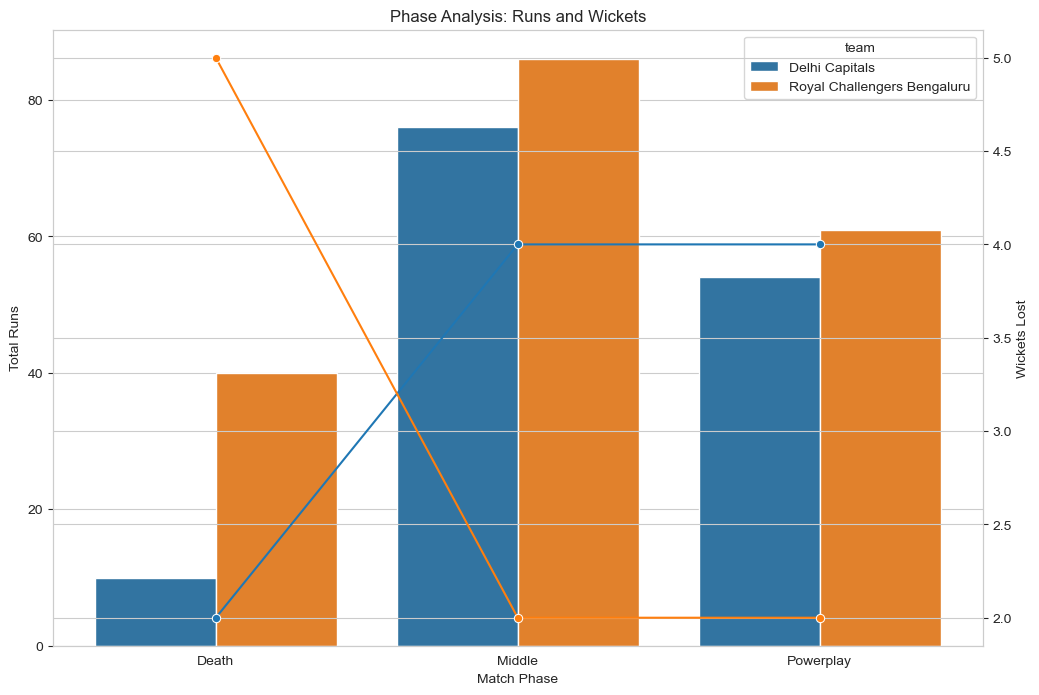

In [78]:
# let’s perform a Phase Analysis to examine how teams performed during different stages of their innings; Powerplay (first 6 overs), Middle overs (7-15), and Death overs (16-20).
# We’ll look at scoring rates and wicket loss during these phases. This can offer insights into the team’s tactical approach and execution under varying conditions:
# function to classify the phase of the game based on the over number
def classify_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 16:
        return 'Middle'
    else:
        return 'Death'
# adding phase information to the dataframe
df['phase']=df['over'].apply(classify_phase)
# grouping data by phase and team to calculate runs and wickets
phase_analysis = df.groupby(['team', 'phase']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'count'}).rename(columns={'over': 'balls'}).reset_index()
# calculating the run rate
phase_analysis['run_rate']= (phase_analysis['runs_total'] / phase_analysis['balls'])* 6
# plotting the phase analysis
fig, ax1 = plt.subplots(figsize=(12,8))
#bar plot for runs scored in eaach phase
sns.barplot(data=phase_analysis, x='phase', y='runs_total', hue='team', ax=ax1)
ax1.set_title('Phase Analysis: Runs and Wickets')
ax1.set_ylabel('Total Runs')
ax1.set_xlabel('Match Phase')
#line plot for wicket lost
ax2 = ax1.twinx()
sns.lineplot(data=phase_analysis, x='phase', y='wickets_taken',hue='team', marker='o', ax=ax2, legend=False)
ax2.set_ylabel('Wickets Lost')

plt.show()

In [89]:
#let’s calculate the strike rates for all batters in this match and then analyze the data to see which players were the most effective in terms of scoring quickly.
#After calculating the strike rates, we can look at correlations with other variables such as runs scored or the phase of play during which the runs were scored.
#This can give us insights into which players accelerate scoring at crucial times or against specific bowlers. First, I’ll calculate the strike rate for each batter
# calculate runs and balls faced for each batter
batter_stats = df.groupby('batter').agg({'runs_batter' : 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()

# calculate strike rate for each batter (runs per 100 balls)
batter_stats['strike_rate']= (batter_stats['runs_batter'] / batter_stats['balls_faced']) * 100

# sorting batters by their strike rate
batter_stats_sorted = batter_stats.sort_values(by='strike_rate', ascending=False)

# displaying calculated strike rates along with runs scored and balls faced
batter_stats_sorted.head(10)

,batter,runs_batter,balls_faced,strike_rate
6,J Fraser-McGurk,21,8,262.500000
18,V Kohli,27,14,192.857143
13,RM Patidar,52,34,152.941176
8,KV Sharma,6,4,150.000000
0,AR Patel,57,40,142.500000
19,WG Jacks,41,30,136.666667
2,C Green,32,24,133.333333
11,MK Lomror,13,10,130.000000
15,SD Hope,29,24,120.833333
4,F du Plessis,6,7,85.714286


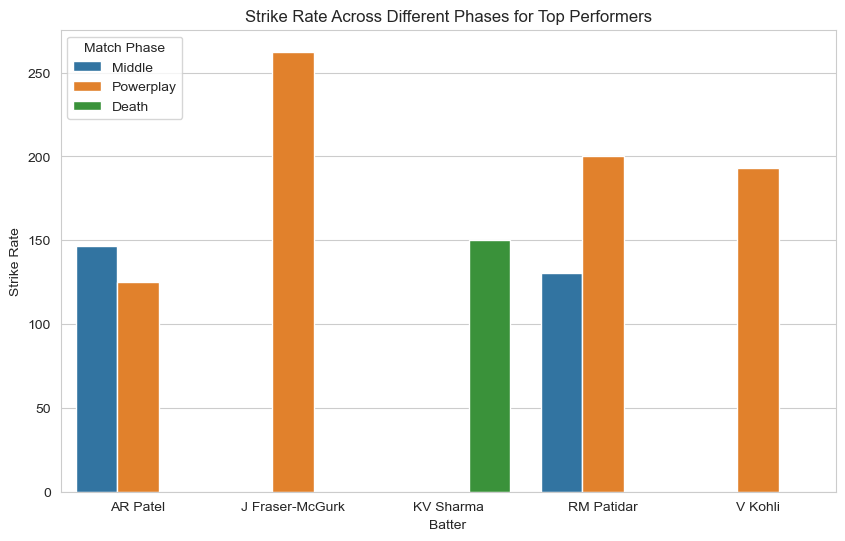

In [91]:
# merging phase information with batter stats
batter_phase_stats = df.groupby(['batter', 'phase']).agg({'runs_batter': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()

# calculate strike rate for each batter-phase combination
batter_phase_stats['strike_rate'] = (batter_phase_stats['runs_batter'] / batter_phase_stats['balls_faced']) * 100

# filtering for top performers based on overall strike rate
top_performers = batter_stats_sorted.head(5)['batter']
batter_phase_stats_top = batter_phase_stats[batter_phase_stats['batter'].isin(top_performers)]

# plotting strike rate across different phases for top performers
plt.figure(figsize=(10, 6))
sns.barplot(data=batter_phase_stats_top, x='batter', y='strike_rate', hue='phase')
plt.title('Strike Rate Across Different Phases for Top Performers')
plt.xlabel('Batter')
plt.ylabel('Strike Rate')
plt.legend(title='Match Phase')
plt.show()

C:\Users\amitj\AppData\Local\Temp\ipykernel_26292\457136056.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rcb_deliveries['over_ball'] = rcb_deliveries['over'] + (rcb_deliveries.groupby('over').cumcount() + 1) / 6
C:\Users\amitj\AppData\Local\Temp\ipykernel_26292\457136056.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_deliveries['over_ball'] = dc_deliveries['over'] + (dc_deliveries.groupby('over').cumcount() + 1) / 6


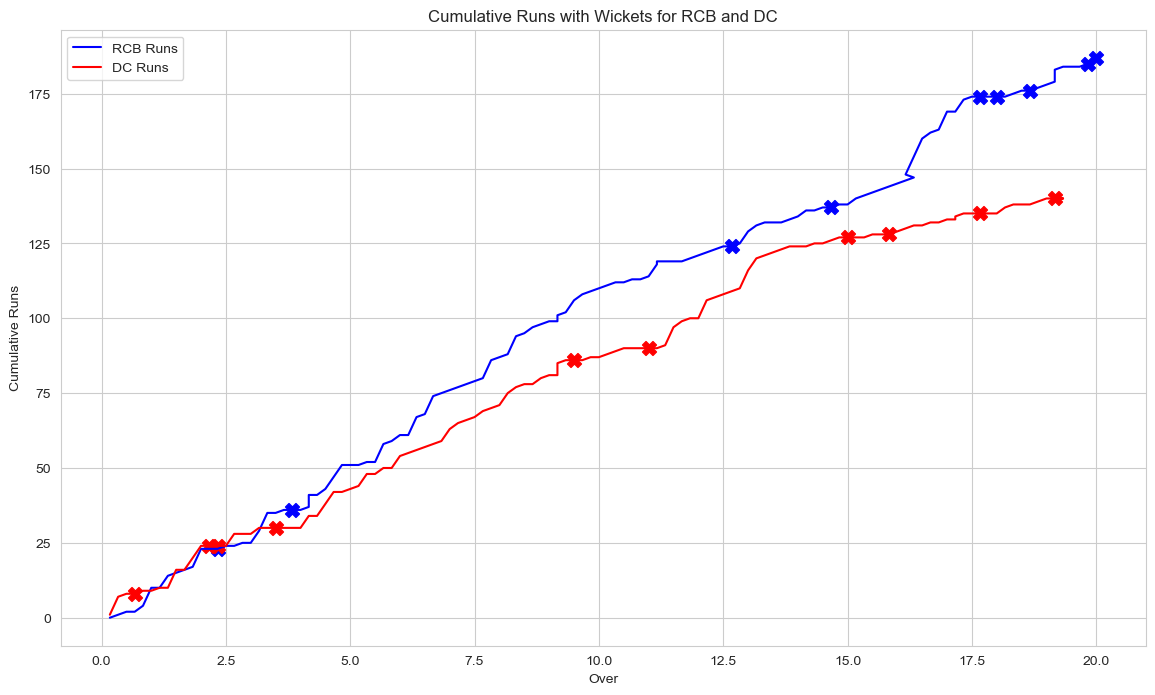

In [96]:
#To identify the turning point where Delhi Capitals (DC) might have lost the game and Royal Challengers Bangalore (RCB) gained
#the upper hand, we can analyze the cumulative run rate comparison throughout the innings and look at wicket fall events.
#Specifically, we can:
#Compare Cumulative Run Rates: Plot the cumulative run rates of both teams throughout their innings to see where RCB started to outpace DC significantly.
#Wicket Analysis: Examine the timings and impacts of wicket falls on the scoring rate and momentum for DC.
#High-Impact Overs: Identify any overs where RCB took multiple wickets or DC had a significantly low scoring rate, which could indicate a loss of momentum.
# calculate cumulative runs and wickets for each ball for both teams
df['cumulative_runs'] = df.groupby('team')['runs_total'].cumsum()
df['cumulative_wickets'] =df.groupby('team')['wickets_taken'].cumsum()

# separate data for both teams
rcb_deliveries = df[df['team'] == 'Royal Challengers Bengaluru']
dc_deliveries = df[df['team'] == 'Delhi Capitals']

# calculating overs for cumulative analysis
rcb_deliveries['over_ball'] = rcb_deliveries['over'] + (rcb_deliveries.groupby('over').cumcount() + 1) / 6
dc_deliveries['over_ball'] = dc_deliveries['over'] + (dc_deliveries.groupby('over').cumcount() + 1) / 6

# plotting cumulative run rates and wickets
fig, ax = plt.subplots(figsize=(14, 8))

# plot for RCB
ax.plot(rcb_deliveries['over_ball'], rcb_deliveries['cumulative_runs'], color='blue', label='RCB Runs')
ax.scatter(rcb_deliveries[rcb_deliveries['wickets_taken'] == 1]['over_ball'], rcb_deliveries[rcb_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='blue', marker='X', s=100)

# plot for DC
ax.plot(dc_deliveries['over_ball'], dc_deliveries['cumulative_runs'], color='red', label='DC Runs')
ax.scatter(dc_deliveries[dc_deliveries['wickets_taken'] == 1]['over_ball'], dc_deliveries[dc_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='red', marker='X', s=100)

ax.set_title('Cumulative Runs with Wickets for RCB and DC')
ax.set_xlabel('Over')
ax.set_ylabel('Cumulative Runs')
ax.legend()
plt.show()

###Now, let’s calculate the run rate for each over for both teams and see how the run rates changed throughout the innings, particularly focusing on the overs where wickets fell:

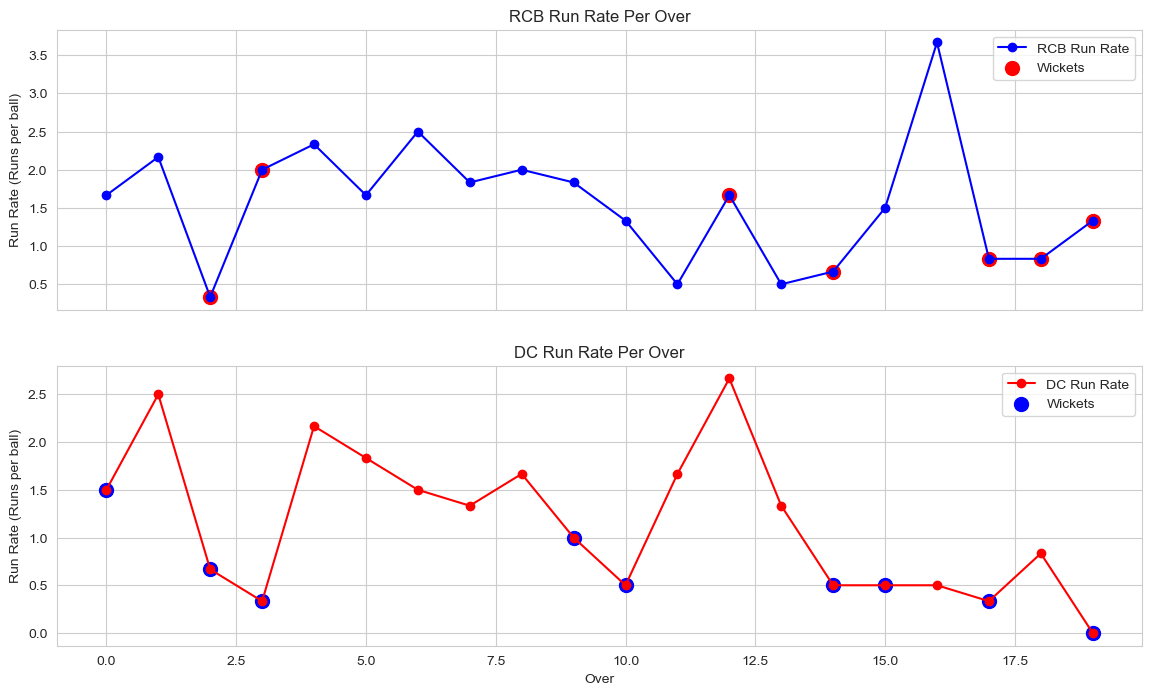

In [98]:

# calculate runs and wickets per over for both teams
per_over_stats = df.groupby(['team', 'over']).agg({'runs_total': 'sum', 'wickets_taken': 'sum'}).reset_index()

# calculate run rate for each over
per_over_stats['run_rate'] = (per_over_stats['runs_total'] / 6)    # Runs per over to runs per ball (standard rate)

# separate data for RCB and DC for plotting
rcb_per_over_stats = per_over_stats[per_over_stats['team'] == 'Royal Challengers Bengaluru']
dc_per_over_stats = per_over_stats[per_over_stats['team'] == 'Delhi Capitals']

# plotting run rates and marking wickets for each team
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# RCB
ax1.plot(rcb_per_over_stats['over'], rcb_per_over_stats['run_rate'], marker='o', color='blue', label='RCB Run Rate')
ax1.scatter(rcb_per_over_stats[rcb_per_over_stats['wickets_taken'] > 0]['over'], rcb_per_over_stats[rcb_per_over_stats['wickets_taken'] > 0]['run_rate'], color='red', s=100, label='Wickets')
ax1.set_title('RCB Run Rate Per Over')
ax1.set_ylabel('Run Rate (Runs per ball)')
ax1.legend()

# DC
ax2.plot(dc_per_over_stats['over'], dc_per_over_stats['run_rate'], marker='o', color='red', label='DC Run Rate')
ax2.scatter(dc_per_over_stats[dc_per_over_stats['wickets_taken'] > 0]['over'], dc_per_over_stats[dc_per_over_stats['wickets_taken'] > 0]['run_rate'], color='blue', s=100, label='Wickets')
ax2.set_title('DC Run Rate Per Over')
ax2.set_xlabel('Over')
ax2.set_ylabel('Run Rate (Runs per ball)')
ax2.legend()

plt.show()

## The plotted run rates for each over, along with the moments when wickets were taken (marked with large dots), provide insights into how the match’s dynamics evolved:




## RCB Run Rate Fluctuations:
RCB’s run rate shows significant fluctuations, peaking at around 3.5 runs per ball towards the end of the innings. The presence of wicket markers (red circles) indicates that wickets were taken during overs where the run rate was generally lower, which is typical as wickets tend to disrupt batting flow.

## DC Run Rate Patterns:
DC’s run rate starts strong but sees a sharp decline after the initial overs, stabilizing somewhat in the middle before another peak and subsequent fall towards the end. Wickets (blue circles) are taken in overs where the run rate drops, suggesting effective bowling from RCB during these times.

### Summary

## The match between RCB and DC showcased a blend of strategic batting, aggressive bowling, and critical partnerships. RCB’s ability to maintain a higher cumulative run rate and effective wicket-taking in crucial overs contributed significantly to their victory. The detailed phase-wise and player-specific analysis not only highlights the dynamics of T20 cricket but also assists in understanding how momentum shifts and strategic decisions impact the game’s outcome.